# Fine-tune Vietnamese to English Model (Vi-En)

## STEP 1 - Path configuration for kaggle training (optional)

In [1]:
import shutil
import os
import sys

# Đường dẫn nguồn
src = '/kaggle/input/finetuning-models'

# Đường dẫn đích
dst = '/kaggle/working/finetuning-models'

# Copy folder
shutil.copytree(src, dst, dirs_exist_ok=True)

# Thêm vào đường dẫn hệ thống
sys.path.append(dst)

## STEP 2 - Training model

2025-12-30 02:25:41.079903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767061541.249146      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767061541.296677      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767061541.686181      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767061541.686227      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767061541.686230      24 computation_placer.cc:177] computation placer alr

Loading model: vinai/vinai-translate-vi2en


config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.88M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

Trainable params: 7077888 || All params: 455503872
Trainable%: 1.5538590196660282
Forced BOS token ID for evaluation set to: 90303 (en_XX)
Using dataset Helsinki-NLP/opus-100 config en-vi...


README.md: 0.00B [00:00, ?B/s]

en-vi/test-00000-of-00001.parquet:   0%|          | 0.00/137k [00:00<?, ?B/s]

en-vi/train-00000-of-00001.parquet:   0%|          | 0.00/59.0M [00:00<?, ?B/s]

en-vi/validation-00000-of-00001.parquet:   0%|          | 0.00/138k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset size: 400000
Preprocessing dataset...


Map:   0%|          | 0/360000 [00:00<?, ? examples/s]

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

The model is already on multiple devices. Skipping the move to device specified in `args`.


Starting training...


Step,Training Loss,Validation Loss
500,1.225200,1.212885
1000,1.206600,1.204493
1500,1.224300,1.202002
2000,1.222000,1.199620
2500,1.214300,1.199171
3000,1.202500,1.195213
3500,1.229600,1.196055
4000,1.235500,1.194046
4500,1.202600,1.192814
5000,1.187100,1.190852


Loss chart saved to /kaggle/working/lora-vinai-vi2en/loss_chart.png
Saving LoRA adapter and tokenizer to /kaggle/working/lora-vinai-vi2en


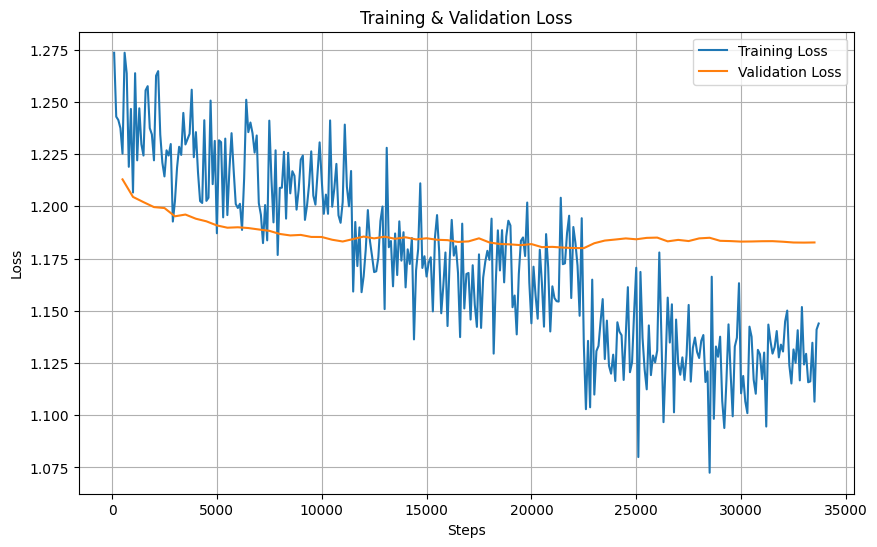

In [ ]:
import os
from fine_tuning import run_finetuning
import matplotlib.pyplot as plt

MODEL_NAME = "vinai/vinai-translate-vi2en"
OUTPUT_DIR = "/kaggle/working/lora-vinai-vi2en" if os.path.exists("/kaggle/working") else "./lora-vinai-vi2en"

if __name__ == "__main__":
    run_finetuning(
        model_name=MODEL_NAME,
        output_dir=OUTPUT_DIR,
        source_lang="vi",
        target_lang="en",
        dataset_name="Helsinki-NLP/opus-100",
        dataset_config="en-vi"
    )